**the copy based on copy1, to conduct PCA before regression.** <br>
Due to large dimension and computing capacity, must reduce dimension before doing regression.<br>
Last version, failed to run RFE for feature selection. RFE is better when choosing a few features from a relatively small feature space

In [1]:
import sys
sys.path.append(r'C:\Users\lzowe\OneDrive - The City College of New York\CCNY_Course\Applied_Machine_Learning_and_Data_Mining\codes\project-product-price-prediction')

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from final.feature_extraction.vectorization import text_vectorizaion
from final.dimension_reduction.feature_reduction import dimension_reduction

matplotlib.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.constrained_layout.use'] = True

# Data preparation for regression

## loading data processed using Tokenizing and tf-idf algorithm

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/DSEI21000-S21/project-product-price-prediction/main/data/random_samples/stratified_sampling_clean_text_data_by_price_whigh_sz50000_1619835594.csv")

In [4]:
df.shape

(50000, 34)

In [5]:
df.describe()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,item_name_upper_char_count,item_name_stopword_count,item_name_punctuation_count,item_name_number_count,item_name_after_word_count,item_name_after_char_count,item_name_after_avg_word_len,item_condition_id,shipping,price
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,7.373508e+05,26.583180,150.390920,5.667798,1.876040,12.577260,7.67970,5.850200,0.499880,18.323300,...,4.794540,0.192960,0.414340,0.177680,4.236300,24.381740,5.845573,1.991820,0.376700,108.41749
std,4.251891e+05,28.205148,161.300927,0.782677,5.826971,28.114883,10.36772,8.336725,1.229061,18.691275,...,5.226287,0.463088,0.828128,0.422508,1.535705,8.740065,1.210724,0.896911,0.484564,198.75487
min,1.900000e+01,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.00000
25%,3.726685e+05,8.000000,46.000000,5.210526,0.000000,2.000000,1.00000,1.000000,0.000000,7.000000,...,2.000000,0.000000,0.000000,0.000000,3.000000,18.000000,5.000000,1.000000,0.000000,20.00000
50%,7.353620e+05,17.000000,97.000000,5.642857,0.000000,5.000000,4.00000,3.000000,0.000000,12.000000,...,3.000000,0.000000,0.000000,0.000000,4.000000,25.000000,5.750000,2.000000,0.000000,50.00000
75%,1.102881e+06,34.000000,191.000000,6.020944,1.000000,12.000000,10.00000,8.000000,1.000000,23.000000,...,6.000000,0.000000,1.000000,0.000000,5.000000,32.000000,6.500000,3.000000,1.000000,90.00000
max,1.482519e+06,206.000000,1007.000000,19.600000,178.000000,761.000000,104.00000,308.000000,57.000000,175.000000,...,37.000000,6.000000,12.000000,9.000000,13.000000,42.000000,26.000000,5.000000,1.000000,2009.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   train_id                             50000 non-null  int64  
 1   clean_item_description               50000 non-null  object 
 2   item_description_bef_word_count      50000 non-null  float64
 3   item_description_bef_char_count      50000 non-null  float64
 4   item_description_bef_avg_word_len    50000 non-null  float64
 5   item_description_upper_word_count    50000 non-null  float64
 6   item_description_upper_char_count    50000 non-null  float64
 7   item_description_stopword_count      50000 non-null  float64
 8   item_description_punctuation_count   50000 non-null  float64
 9   item_description_number_count        50000 non-null  float64
 10  item_description_after_word_count    50000 non-null  float64
 11  item_description_after_char_

In [7]:
df.clean_item_name.unique().shape

(42039,)

In [8]:
df.head()

,train_id,clean_item_description,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,new tags,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,...,5.250000,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,nastasya every hills lipstick fashion,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,...,10.000000,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"
2,1423115,brand new tags taken bag pictures,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,...,6.166667,1,Women/Jeans/Leggings,LuLaRoe,0,54.0,women,jeans,leggings,"(50, 60]"
3,405853,bought calves bit large frowned good condition...,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,...,5.333333,3,Women/Shoes/Boots,Hunter,0,84.0,women,shoes,boots,"(80, 90]"
4,1172086,brand new box size 7youth859womens,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,...,4.000000,1,Women/Shoes/Athletic,Nike,0,56.0,women,shoes,athletic,"(50, 60]"


 ## Feature extraction and dimension selection
 
 For Item-discription feature: <br>
 using Jin's function to, firstly, do feature-extraction, increasing up to 14230 new few features <br>
 secondly, do dimenstion-reduction <br>
 finally, left 100 

In [9]:
df.clean_item_description[12]

'corners bottom great shape lips smells markings inside cleanthere small water mark indicated third photo comes dusting'

In [18]:
description_feature,  description_feature_name = text_vectorizaion(df, text_col = "clean_item_description", 
                                                                   tfidf = True, min_df=10, max_features=100000)

In [19]:
description_feature.shape

(50000, 14230)

In [22]:
data = dimension_reduction(description_feature.toarray(), method = 'SVD', n_comp = 100)

In [23]:
data.shape

(50000, 100)

In [24]:
df_cid = pd.DataFrame(data.copy()) #df for cleaned item description transforming to new features
df_cid.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000323,0.316579,0.226464,-0.093895,-0.145724,-0.160603,-0.003326,-0.018080,0.090899,0.191937,...,-0.000162,0.006184,0.001493,0.002215,0.004637,-0.009510,-0.002965,-0.012123,0.000925,-0.004534
1,0.000036,0.006363,-0.001485,-0.000308,-0.003074,0.008710,0.000230,-0.001265,-0.002301,0.001763,...,0.010199,0.006671,0.000297,-0.005570,0.000096,0.005439,-0.000294,0.003562,0.002618,-0.022127
2,0.000307,0.282559,0.198734,-0.108194,-0.022315,-0.049011,-0.093210,0.013352,-0.023776,0.027208,...,-0.017481,-0.020886,0.010136,0.022030,-0.004427,0.027268,0.028090,0.001704,0.008308,-0.017329
3,0.000196,0.087350,-0.138583,-0.028886,-0.007240,-0.041191,-0.030505,0.157934,0.007519,0.001815,...,0.000969,-0.003727,0.006926,-0.033910,0.021533,-0.046227,-0.022477,0.008177,0.009686,-0.003304
4,0.000409,0.407447,0.230953,-0.090665,-0.028014,-0.120190,-0.079098,0.052897,-0.152960,-0.178794,...,0.005267,-0.013488,0.000658,-0.005519,0.001502,0.026397,0.021090,-0.001629,0.017143,0.015061


## Concatenating new features df_cid and previous df

In [25]:
df1=df.copy()
df1.drop("clean_item_description", inplace=True,axis=1)
df1.head()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,2.0,...,5.250000,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,5.0,...,10.000000,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"
2,1423115,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,6.0,...,6.166667,1,Women/Jeans/Leggings,LuLaRoe,0,54.0,women,jeans,leggings,"(50, 60]"
3,405853,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,17.0,...,5.333333,3,Women/Shoes/Boots,Hunter,0,84.0,women,shoes,boots,"(80, 90]"
4,1172086,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,5.0,...,4.000000,1,Women/Shoes/Athletic,Nike,0,56.0,women,shoes,athletic,"(50, 60]"


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   train_id                             50000 non-null  int64  
 1   item_description_bef_word_count      50000 non-null  float64
 2   item_description_bef_char_count      50000 non-null  float64
 3   item_description_bef_avg_word_len    50000 non-null  float64
 4   item_description_upper_word_count    50000 non-null  float64
 5   item_description_upper_char_count    50000 non-null  float64
 6   item_description_stopword_count      50000 non-null  float64
 7   item_description_punctuation_count   50000 non-null  float64
 8   item_description_number_count        50000 non-null  float64
 9   item_description_after_word_count    50000 non-null  float64
 10  item_description_after_char_count    50000 non-null  float64
 11  item_description_after_avg_w

In [27]:
df1.shape,df_cid.shape

((50000, 33), (50000, 100))

In [28]:
df_concat=pd.concat([df1,df_cid],axis=1)
df_concat.shape

(50000, 133)

## Using one-hot encoding for category and nominal features

delete price bins

In [29]:
cols_catNnom = ['category_name','brand_name', 'c1', 'c2', 'c3'] # columns of category and nominal features

In [30]:
from final.feature_encoding.one_hot_encoding import one_hot_encode_feature
df_encode = df_concat
for col in cols_catNnom:
    df_encode, col_encode = one_hot_encode_feature(df_encode, encode_column=col,drop_first=False)
df_encode.shape

(50000, 3028)

In [31]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3028 entries, train_id to c3_yoga & pilates
dtypes: float64(123), int64(3), object(2), uint8(2900)
memory usage: 187.1+ MB


In [32]:
df_encode.head()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,c3_window treatments,"c3_wine, beer & beverage coolers",c3_wipes & holders,c3_women,c3_women's golf clubs,c3_wool,c3_work & safety,c3_wrap,c3_writing,c3_yoga & pilates
0,806824,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,772820,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,1423115,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,405853,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,17.0,...,0,0,0,0,0,0,0,0,0,0
4,1172086,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_encode[["price"]]

,price
0,15.0
1,22.0
2,54.0
3,84.0
4,56.0
...,...
49995,1609.0
49996,205.0
49997,36.0
49998,20.0


In [34]:
# prepare input X, y
X, y = df_encode.copy().drop(["clean_item_name","train_id","price","price_bin"],axis=1), df_encode[["price"]] 

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3024 entries, item_description_bef_word_count to c3_yoga & pilates
dtypes: float64(122), int64(2), uint8(2900)
memory usage: 185.6 MB


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

## Conduct dimension reduction on the dateframe processed by one-hot encoding
skip this step in the first place. <br>
let us see how the regression result looks like. and then determine if the dimension reduction on whole dataset needed, or if use other techniques to avoid overfitting(e.g. adding penalty, using RobustScaler, conducting cross validation).<br>



* log 1: actually can't skip this step, the dimension is too large to run, Exception was raised: MemoryError: Unable to allocate 11.8 GiB for an array with shape (45079, 35000) and data type float64.
Therefore, try conduct PCA again before regression

* log 2: even can't not run PCA due to the large number of features. Try drop clean_item_name instead of encoding it, as it is has very less duplicated items.

* log 3: Since log2 works, skip this step( e.i. 1.5) for now.

* log 4: features are too much later, have to reduce dimension at this step.

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # reduce features to 50
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.00290452, 0.00227656, 0.00213737, 0.00197211, 0.0018782 ,
       0.00186   , 0.00180486, 0.00177907, 0.00174713, 0.00167492,
       0.00161504, 0.00159662, 0.00154249, 0.00153705, 0.00145978,
       0.00145388, 0.00144623, 0.00143838, 0.00143009, 0.00141804,
       0.00141467, 0.00141096, 0.00140848, 0.00140426, 0.00139535,
       0.0013908 , 0.00138366, 0.00137919, 0.00137138, 0.00136821,
       0.00135522, 0.00135229, 0.00134384, 0.00133781, 0.0013262 ,
       0.00130941, 0.00129653, 0.00128607, 0.0012781 , 0.00127189,
       0.00126516, 0.00125693, 0.00125102, 0.00124276, 0.00123412,
       0.00121429, 0.00120497, 0.00120168, 0.0011877 , 0.00116963])

In [39]:
X_train_pca.shape, X_test_pca.shape 

((35000, 50), (15000, 50))

# Regression Model Selection
Proposal:
1. try different regression techniques, and select the best one;
      - DT regressor
      * Ensemble method
      - Adding polynomial items to multiple linear regression? 
      - Tensorflow.Keras
2. focus on the selected one and tuning modelling.(Guessing propably would use Ensemble learning or Keras in the end)<br>
**Based on the our previous experiment so far, our results have both large bias and variance.** Probably need to use more powerful algorithm to improve the bias, and then considering solve overfitting issue?

## Regression Tree

In [40]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score 
def evaluate_dt_regressor(X_train, X_test, y_train, y_test,n_iter,max_depth):
    # the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
    MSE_test=[]
    EVS_test=[]
    R2_test=[]
    MSE_train=[]
    EVS_train=[]
    R2_train=[]
    for i in range(n_iter):
        rg = tree.DecisionTreeRegressor(max_depth=max_depth)
        rg.fit(X_train, y_train)
        y_train_pred = rg.predict(X_train)
        y_pred = rg.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        EVS_train.append(explained_variance_score(y_train, y_train_pred))
        R2_train.append(r2_score(y_train, y_train_pred))
        
        MSE_test.append(mean_squared_error(y_test, y_pred))
        EVS_test.append(explained_variance_score(y_test, y_pred))
        R2_test.append(r2_score(y_test, y_pred))
    print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
    print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

In [41]:
evaluate_dt_regressor(X_train_pca, X_test_pca, y_train, y_test,1,max_depth=None)

Train score: MSE: 1.4285714285714285e-05 EVS: 0.9999999996453222 R2: 0.9999999996453222
Test score: MSE: 25563.02895 EVS: 0.32179118366443094 R2: 0.3217732698049083


In [43]:
evaluate_dt_regressor(X_train_pca, X_test_pca,y_train, y_test,1,max_depth=3)

Train score: MSE: 28488.014051521317 EVS: 0.2927152881095668 R2: 0.2927152881095667
Test score: MSE: 25593.412415670635 EVS: 0.32100058359066974 R2: 0.32096714942636884


In [44]:
evaluate_dt_regressor(X_train_pca, X_test_pca,  y_train, y_test,1,max_depth=5)

Train score: MSE: 23668.830832601077 EVS: 0.4123633130079254 R2: 0.4123633130079254
Test score: MSE: 22268.274667473517 EVS: 0.40919334227164983 R2: 0.4091882012750778


In [42]:
evaluate_dt_regressor(X_train_pca, X_test_pca,  y_train, y_test,10,max_depth=None)

Train score: MSE: 1.4285714285714289e-05 EVS: 0.9999999996453222 R2: 0.9999999996453222
Test score: MSE: 25039.368356666666 EVS: 0.33575569278283396 R2: 0.3356667959845784


## Linear Regression

In [45]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_pca, y_train)
reg.coef_

array([[ 20.09742699,   3.33146439, -12.39210691,   0.20636868,
         -7.80892106,  10.46098518,  -0.38913397,   7.1040594 ,
        -22.88255888,  -6.51569881,   6.38323525,  -6.82233759,
          0.50093439,  -2.98310321,  -5.80164048,  -0.41172873,
          3.76489282,   0.81125286,  -3.11429064,  -3.28169822,
         -5.37211941,  -0.27019337,  -2.79088729, -10.07583201,
          6.37907991,   8.31669717,   4.69155748,   1.06908021,
          5.11176258,  -3.84294021,   8.41289658,  -6.72101608,
          7.22826676,  -2.66738023,   6.60358127,  -0.8122357 ,
         -4.21020264,   4.44214887,  -3.88482086,  -3.62205375,
          8.68074605,  -4.18221312,  -3.36449821,   0.14635779,
         -2.44257515,  -0.75759656,   0.23913932,   3.70954428,
         -2.14824853,  -1.30205249]])

why linear regression is so slow. after 1 and harf hour, not completed

In [46]:
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score 

In [48]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_pca, y_train)
y_train_pred = reg.predict(X_train_pca)
y_pred = reg.predict(X_test_pca)

print("train:",
{
    "MSE": mean_squared_error(y_train, y_train_pred), 
    "EVS": explained_variance_score(y_train, y_train_pred), 
    "R2": r2_score(y_train, y_train_pred)
})

print("test:",
{
    "MSE": mean_squared_error(y_test, y_pred), 
    "EVS": explained_variance_score(y_test, y_pred), 
    "R2": r2_score(y_test, y_pred)
})


train: {'MSE': 28900.583072493755, 'EVS': 0.28247225184155333, 'R2': 0.28247225184155333}
test: {'MSE': 26294.160732734363, 'EVS': 0.3024252728527732, 'R2': 0.3023752118002979}


In [50]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5) # tuning alpha does not help
reg.fit(X_train_pca, y_train)
y_train_pred = reg.predict(X_train_pca)
y_pred = reg.predict(X_test_pca)

print("train:",
{
    "MSE": mean_squared_error(y_train, y_train_pred), 
    "EVS": explained_variance_score(y_train, y_train_pred), 
    "R2": r2_score(y_train, y_train_pred)
})

print("test:",
{
    "MSE": mean_squared_error(y_test, y_pred), 
    "EVS": explained_variance_score(y_test, y_pred), 
    "R2": r2_score(y_test, y_pred)
})


train: {'MSE': 28900.58307259148, 'EVS': 0.28247225183912716, 'R2': 0.28247225183912716}
test: {'MSE': 26294.160725965943, 'EVS': 0.30242527305072064, 'R2': 0.3023752119798745}


In [52]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.8) # tuning alpha does not help
reg.fit(X_train_pca, y_train)
y_train_pred = reg.predict(X_train_pca)
y_pred = reg.predict(X_test_pca)

print("train:",
{
    "MSE": mean_squared_error(y_train, y_train_pred), 
    "EVS": explained_variance_score(y_train, y_train_pred), 
    "R2": r2_score(y_train, y_train_pred)
})

print("test:",
{
    "MSE": mean_squared_error(y_test, y_pred), 
    "EVS": explained_variance_score(y_test, y_pred), 
    "R2": r2_score(y_test, y_pred)
})

train: {'MSE': 28908.592080525163, 'EVS': 0.2822734086042614, 'R2': 0.2822734086042614}
test: {'MSE': 26301.443289222272, 'EVS': 0.3022302678099197, 'R2': 0.3021819943031102}


## Ensemble learning

### Random Forest (Bagging) for classification, also for regression

In [53]:
from sklearn.ensemble import RandomForestRegressor
def evaluate_rf_regressor(X_train, X_test, y_train, y_test,n_iter,max_depth,random_state):
    MSE_test=[]
    EVS_test=[]
    R2_test=[]
    MSE_train=[]
    EVS_train=[]
    R2_train=[]
    for i in range(n_iter):
        rg = RandomForestRegressor(max_depth=max_depth, random_state=random_state)
        rg.fit(X_train, y_train)
        y_train_pred = rg.predict(X_train)
        y_pred = rg.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        EVS_train.append(explained_variance_score(y_train, y_train_pred))
        R2_train.append(r2_score(y_train, y_train_pred))
        
        MSE_test.append(mean_squared_error(y_test, y_pred))
        EVS_test.append(explained_variance_score(y_test, y_pred))
        R2_test.append(r2_score(y_test, y_pred))
    print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
    print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

rf_regressor turns out very very slow

In [54]:
evaluate_rf_regressor(X_train_pca, X_test_pca, y_train, y_test,1,max_depth=None,random_state=42)

<ipython-input-53-ffee7f25d399>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rg.fit(X_train, y_train)


Train score: MSE: 995.4855787854625 EVS: 0.9758292430529518 R2: 0.9752846327052146
Test score: MSE: 11136.67665048186 EVS: 0.7045604742079421 R2: 0.7045267286333712


#### Check Feature Importance

In [56]:
rg = RandomForestRegressor(max_depth=None, random_state=42)
rg.fit(X_train_pca, y_train)
y_train_pred = rg.predict(X_train_pca)
y_pred = rg.predict(X_test_pca)
MSE_train.append(mean_squared_error(y_train, y_train_pred))
EVS_train.append(explained_variance_score(y_train, y_train_pred))
R2_train.append(r2_score(y_train, y_train_pred))

MSE_test.append(mean_squared_error(y_test, y_pred))
EVS_test.append(explained_variance_score(y_test, y_pred))
R2_test.append(r2_score(y_test, y_pred))
print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

<ipython-input-56-558030b727bd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rg.fit(X_train_pca, y_train)


NameError: name 'MSE_train' is not defined

In [57]:
importances = rg.feature_importances_
importances.shape

(500,)

In [58]:
X.shape

(50000, 3024)

In [62]:
feat_labels = range(X_train_pca.shape[1])
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_pca.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_pca.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_pca.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

 1) 7                              0.105877
 2) 24                             0.063736
 3) 33                             0.055135
 4) 288                            0.033101
 5) 1                              0.030501
 6) 10                             0.025732
 7) 316                            0.017765
 8) 89                             0.014740
 9) 48                             0.012854
10) 469                            0.012297
11) 11                             0.010544
12) 262                            0.009389
13) 2                              0.008283
14) 0                              0.007948
15) 14                             0.007850
16) 491                            0.007349
17) 57                             0.006804
18) 6                              0.006769
19) 34                             0.006605
20) 46                             0.006498
21) 261                            0.005871
22) 476                            0.005158
23) 483                         

IndexError: index 500 is out of bounds for axis 0 with size 500

### Boosting

### Stacking 

## Turning multiple linear regression with polynomial regression

## Tensorflow

In [65]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

print(tf.__version__)

2.3.1


In [83]:
def r_2_score(y_true, y_pred):
    from tensorflow.keras import backend as K
    RSS =  K.sum(K.square( y_true- y_pred ))
    TSS = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1. - RSS/(TSS) )

In [90]:
from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [91]:
input_layer = Input(shape=(X_train_pca.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error","mean_squared_logarithmic_error",det_coeff])

In [92]:
history = model.fit(X_train_pca, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.3)

Epoch 1/100
12250/12250 [==============================] - 14s 1ms/step - loss: 27502.4492 - mean_squared_error: 27502.4492 - mean_squared_logarithmic_error: 1.2241 - det_coeff: -inf - val_loss: 25228.3965 - val_mean_squared_error: 25228.3965 - val_mean_squared_logarithmic_error: 0.9755 - val_det_coeff: -inf
Epoch 2/100
12250/12250 [==============================] - 14s 1ms/step - loss: 23168.6055 - mean_squared_error: 23168.6055 - mean_squared_logarithmic_error: 1.0271 - det_coeff: -inf - val_loss: 24931.4199 - val_mean_squared_error: 24931.4199 - val_mean_squared_logarithmic_error: 1.1732 - val_det_coeff: -infn_squared_error: 22650.7832 - mean_squared_logarithmic_error: 1.0234 - det_c - ETA: 3s - loss: 22628.4902 - mean_squared_error: 2
Epoch 3/100
12250/12250 [==============================] - 13s 1ms/step - loss: 21653.6055 - mean_squared_error: 21653.6055 - mean_squared_logarithmic_error: 0.9881 - det_coeff: -inf - val_loss: 22447.9824 - val_mean_squared_error: 22447.9824 - val_me

12250/12250 [==============================] - 14s 1ms/step - loss: 12940.5039 - mean_squared_error: 12940.5039 - mean_squared_logarithmic_error: 0.7619 - det_coeff: -inf - val_loss: 16808.1348 - val_mean_squared_error: 16808.1348 - val_mean_squared_logarithmic_error: 0.8210 - val_det_coeff: -inf
Epoch 34/100
12250/12250 [==============================] - 14s 1ms/step - loss: 12568.7129 - mean_squared_error: 12568.7129 - mean_squared_logarithmic_error: 0.7597 - det_coeff: -inf - val_loss: 15230.9590 - val_mean_squared_error: 15230.9590 - val_mean_squared_logarithmic_error: 0.8207 - val_det_coeff: -infr: 12721.4277 - mean_squared_logarithmic_error: 0.7 - ETA: 2s - loss: 12274.6953 - mean_squared_error: 12274.6953 - mean_squared_logarithmic_error: 0.7621 - det_coe - ETA: 2s - loss: 12402.8125 - mean_squared_error: 12402.8125 - mean_squared_
Epoch 35/100
12250/12250 [==============================] - 13s 1ms/step - loss: 12562.4775 - mean_squared_error: 12562.4775 - mean_squared_logarithm

Epoch 57/100
12250/12250 [==============================] - 14s 1ms/step - loss: 9886.0420 - mean_squared_error: 9886.0420 - mean_squared_logarithmic_error: 0.6970 - det_coeff: -inf - val_loss: 14483.3555 - val_mean_squared_error: 14483.3555 - val_mean_squared_logarithmic_error: 0.8303 - val_det_coeff: -inf
Epoch 58/100
12250/12250 [==============================] - 14s 1ms/step - loss: 9623.2539 - mean_squared_error: 9623.2539 - mean_squared_logarithmic_error: 0.7022 - det_coeff: -inf - val_loss: 13866.3516 - val_mean_squared_error: 13866.3516 - val_mean_squared_logarithmic_error: 0.7694 - val_det_coeff: -inf
Epoch 59/100
12250/12250 [==============================] - 13s 1ms/step - loss: 9467.2676 - mean_squared_error: 9467.2676 - mean_squared_logarithmic_error: 0.6957 - det_coeff: -inf - val_loss: 14260.2363 - val_mean_squared_error: 14260.2363 - val_mean_squared_logarithmic_error: 0.7792 - val_det_coeff: -inf
Epoch 60/100
12250/12250 [==============================] - 13s 1ms/step 

12250/12250 [==============================] - 14s 1ms/step - loss: 7205.7935 - mean_squared_error: 7205.7935 - mean_squared_logarithmic_error: 0.6558 - det_coeff: -inf - val_loss: 12468.0908 - val_mean_squared_error: 12468.0908 - val_mean_squared_logarithmic_error: 0.7117 - val_det_coeff: -inf
Epoch 96/100
12250/12250 [==============================] - 13s 1ms/step - loss: 7001.9385 - mean_squared_error: 7001.9385 - mean_squared_logarithmic_error: 0.6503 - det_coeff: -inf - val_loss: 12655.1416 - val_mean_squared_error: 12655.1416 - val_mean_squared_logarithmic_error: 0.7551 - val_det_coeff: -inf
Epoch 97/100
12250/12250 [==============================] - 14s 1ms/step - loss: 6961.7334 - mean_squared_error: 6961.7334 - mean_squared_logarithmic_error: 0.6587 - det_coeff: -inf - val_loss: 12182.4082 - val_mean_squared_error: 12182.4082 - val_mean_squared_logarithmic_error: 0.6969 - val_det_coeff: -infan_squared_error: 6920.9702 - mean_squared_logarithmic_e
Epoch 98/100
12250/12250 [====

In [111]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_squared_logarithmic_error', 'det_coeff', 'val_loss', 'val_mean_squared_error', 'val_mean_squared_logarithmic_error', 'val_det_coeff'])

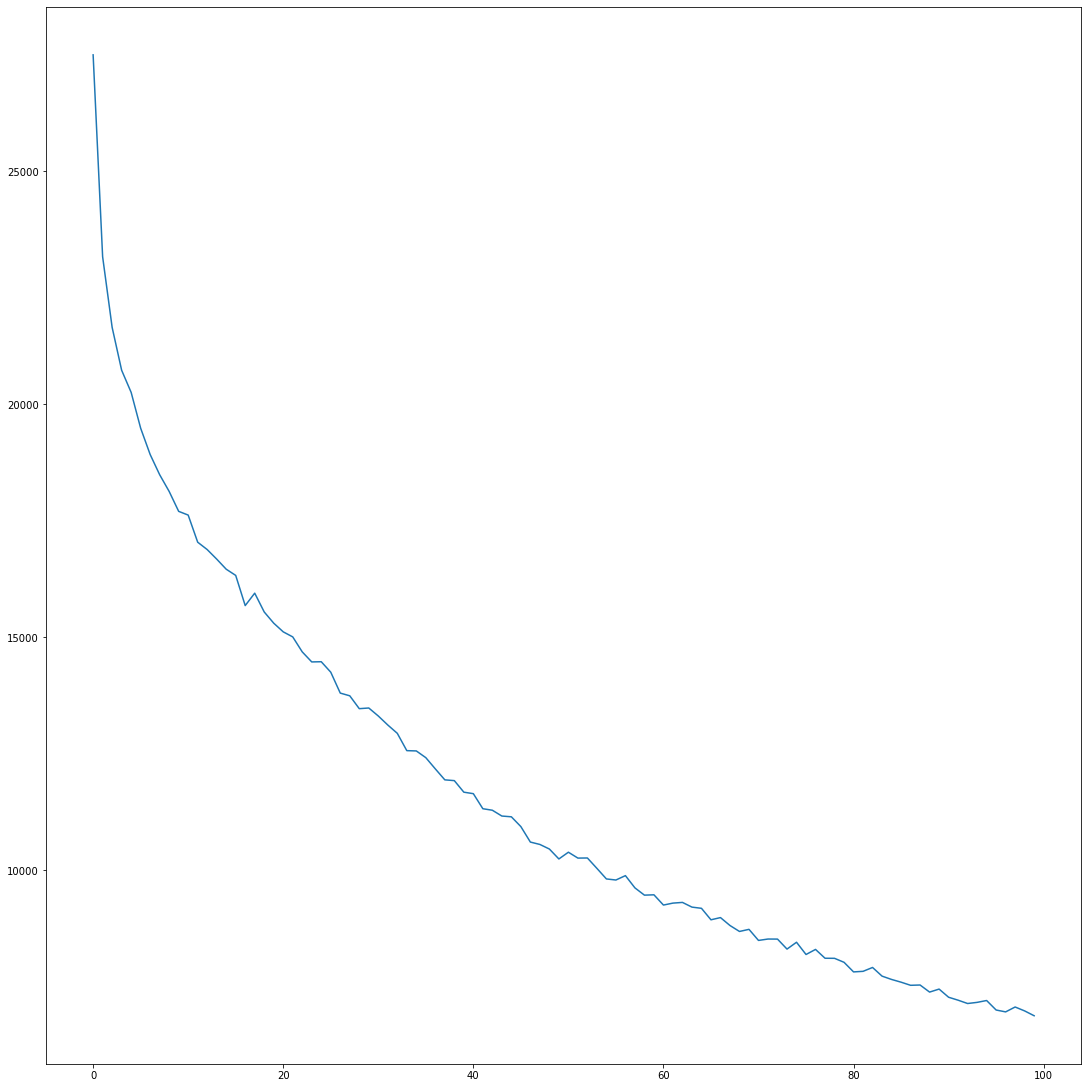

In [114]:
plt.plot(history.history['mean_squared_error'])

In [105]:
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score, mean_squared_log_error

pred_train = model.predict(X_train_pca)
print("Train score:", "MSE:",mean_squared_error(y_train,pred_train),"EVS:",explained_variance_score(y_train,pred_train),"R2:",r2_score(y_train,pred_train))

pred = model.predict(X_test_pca)
print("Test Score:", "MSE:", mean_squared_error(y_test,pred),"EVS:",explained_variance_score(y_test,pred),"R2:",r2_score(y_test,pred))

Train score: MSE: 8415.242815932415 EVS: 0.791611134779733 R2: 0.7910709893715125
Test Score: MSE: 13037.545496267461 EVS: 0.6541490753629551 R2: 0.6540937355663705


In [ ]:
# validation curve
input_layer = Input(shape=(X_test_pca.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error","mean_squared_logarithmic_error"])

In [ ]:
history_val = model.fit(X_test_pca, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.3)

# Fine tune selected model

## Cross_validation

In [106]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=RandomForestRegressor(max_depth=None, random_state=42),
                         X=X_train_pca,
                         y=y_train,
                         cv=3,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


CV accuracy scores: [0.77287256 0.75611395 0.75767496]
CV accuracy: 0.762 +/- 0.008


In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=RandomForestRegressor(max_depth=None, random_state=42),
                         X=X_train_pca,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

CV accuracy scores: [0.81833149 0.79541575 0.77822127 0.7775064  0.7816467 ]
CV accuracy: 0.790 +/- 0.015


## validation curve vs learning curve

In [108]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=RandomForestRegressor(max_depth=None, random_state=42),
                               X=X_train_pca,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 4),
                               cv=None,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
                estimator=RandomForestRegressor(max_depth=None, random_state=42), 
                X=X_train, 
                y=y_train, 
                cv=None)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

## Regularization penalty

# make it pipeline and apply to the whole dataset